## 第一题

观察到和课本相似的图像。

## 第三题

1. 单精度，到2097152项后结果锁定在15.403683。
2. 双精度，前2097152项的结果为15.1333067。
3. 为了估计，列出方程 $\frac{1/n}{\log n} = \frac{1}{2}\varepsilon$ ，表示最后一项的数值相对于整个求和，处在浮点数的最后一位之后。注意到32、64位浮点数分别精度为 24, 53 位。

对于单精度，$\varepsilon=2^{-24}$，带入方程解出 $n=2291248$。
对于双精度，解出 $n=5.31298735e+14$。按照C语言每秒 $5 \times 10^8$ 次计算估算出需要时间为 12.3 天。



Text(0, 0.5, 'Error')

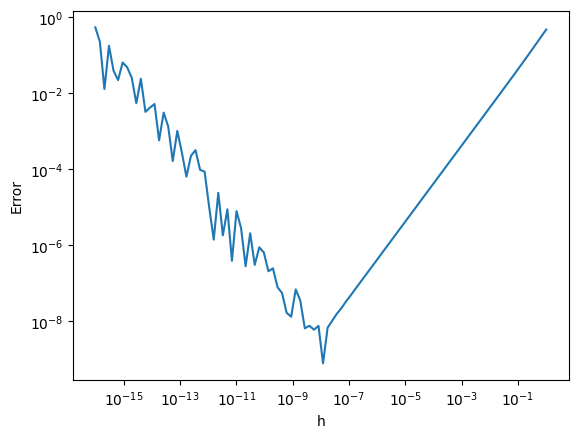

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = 1
hs = 10 ** np.linspace(-16, 0, 100, dtype=np.float64)
estimates = (np.sin(x + hs) - np.sin(x)) / hs
errors = np.abs(estimates - np.cos(x))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(hs, errors)
ax.set_xlabel('h')
ax.set_ylabel('Error')

In [2]:
def calculate(n, dtype):
    terms = np.array(1, dtype=dtype) / np.arange(n + 1, dtype=dtype)
    sum_terms = np.array([0], dtype=dtype)
    for i in range(1, n + 1):
        new_sum = sum_terms + terms[i]
        if new_sum == sum_terms:
            print(i, new_sum)
            return new_sum, i
        sum_terms = new_sum
    return sum_terms, n

result32, num_stop = calculate(10000000, np.float32)
result64, n = calculate(num_stop, np.float64)
print(f"using float32, in {num_stop} terms gives {result32 = }")
print(f"using float64, result in {n} terms gives {result64 = }")

/tmp/ipykernel_19202/2348027732.py:2: RuntimeWarning: divide by zero encountered in divide
  terms = np.array(1, dtype=dtype) / np.arange(n + 1, dtype=dtype)


2097152 [15.403683]
using float32, in 2097152 terms gives result32 = array([15.403683], dtype=float32)
using float64, result in 2097152 terms gives result64 = array([15.1333067])


In [3]:
import scipy
from scipy.optimize import fsolve
from math import log
result32 = fsolve(lambda n: 1 / n / log(n) - 2**-24 / 2, 100)
result64 = fsolve(lambda n: 1 / n / log(n) - 2**-53 / 2, 100)
print(f"{result32 = }")
print(f"{result64 = }")

result32 = array([2291248.32152843])
result64 = array([5.31298735e+14])


/tmp/ipykernel_19202/3711795066.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result32 = fsolve(lambda n: 1 / n / log(n) - 2**-24 / 2, 100)
/tmp/ipykernel_19202/3711795066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result64 = fsolve(lambda n: 1 / n / log(n) - 2**-53 / 2, 100)
